In [4]:
# from curses.ascii import isupper
from astropy.io import ascii
from numpy import *
import subprocess
import matplotlib.pyplot as plt
import os

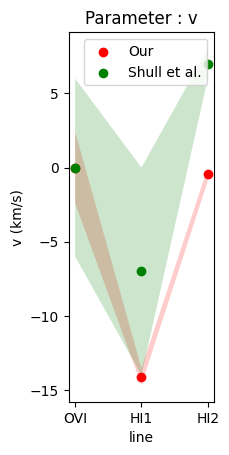

In [10]:
param_line=['OVI      0.1407564505    0.0000092985    25.92999      3.94350  13.627117    0.037619',
            'HI1      0.1407019306    0.0000021890    86.81166     10.11454  13.486395    0.064776', 
            'HI2      0.1407546589    0.0000017485    28.38333      0.69949  14.494759    0.022348']

param_line_Shull=['OVI   0 6 33 122 13.60 0.09',
                  'HI1   -7 7 87 15 13.47 0.10', 
                  'HI2    7 1 28 1  14.51 0.03']

param={}
param_Shull={}

keys=['OVI','HI1','HI2']

for i,key in enumerate(keys):
    line1=param_line[i]
    splitted1=line1.split()
    param[keys[i]]=[float(x) for x in splitted1[1:]]

    line2=param_line_Shull[i]
    splitted2=line2.split()
    param_Shull[keys[i]]=[float(x) for x in splitted2[1:]]

v_z=lambda z : 3e5*(((1+z)**2-1)/((1+z)**2+1))
del_vz=lambda z,z_err: 4*3e5*((1+z)/(((1+z)**2)+1)**2)*z_err


z_abs=0.1407564505
v_abs=v_z(z_abs)


class line():

    def __init__(self,key,Shull=False):

        if Shull==False:

            z, z_err, self.b, self.b_err, self.logN, self.logN_err = param[key]
            self.v=v_z(z)-v_abs
            self.v_err=del_vz(z,z_err)
        
        else:
            self.v, self.v_err, self.b, self.b_err, self.logN, self.logN_err = param_Shull[key]


line_obj=[line(x) for x in keys]
line_obj_Shull=[line(x,Shull=True) for x in keys]

x=linspace(1,len(keys),len(keys))


v=array([i.v for i in line_obj])
v_err=array([i.v_err for i in line_obj])

v_shull=array([i.v for i in line_obj_Shull])
v_err_shull=array([i.v_err for i in line_obj_Shull])

v=[]
v_err=[]
v_shull=[]
v_err_shull=[]


b=[]
b_err=[]
b_shull=[]
b_err_shull=[]

logN=[]
logN_err=[]
logN_shull=[]
logN_err_shull=[]

for i in range(len(keys)):

    v.append(line_obj[i].v)
    v_err.append(line_obj[i].v_err)
    v_shull.append(line_obj_Shull[i].v)
    v_err_shull.append(line_obj_Shull[i].v_err)

    b.append(line_obj[i].b)
    b_err.append(line_obj[i].b_err)
    b_shull.append(line_obj_Shull[i].b)
    b_err_shull.append(line_obj_Shull[i].b_err)

    v.append(line_obj[i].v)
    v_err.append(line_obj[i].v_err)
    v_shull.append(line_obj_Shull[i].v)
    v_err_shull.append(line_obj_Shull[i].v_err)




plt.subplot(1,3,1)

plt.title('Parameter : v')

plt.scatter(x,v,label='Our',color='red')
plt.fill_between(x,v-v_err,v+v_err,alpha=0.2,facecolor='red')

plt.scatter(x,v_shull,label='Shull et al.',color='green')
plt.fill_between(x,v_shull-v_err_shull,v_shull+v_err_shull,alpha=0.2,facecolor='green')

plt.xlabel('line')
plt.ylabel('v (km/s)')
plt.xticks(x,keys)



plt.legend()
plt.show()









In [8]:
from numpy import sqrt

v_z=lambda z : 3e5*(((1+z)**2-1)/((1+z)**2+1))

z=0.16716

v_abs=v_z(z)
# print(v_z(0.1384949293)-v_abs)
# print(v_z(0.1386447375)-v_abs)
# print(v_z(0.1385057088)-v_abs)

v_sep=45
z1=sqrt((1+((v_abs+v_sep)/3e5))/(1-((v_abs+v_sep)/3e5)))-1

print(z1)

0.16733930845283984


In [ ]:
n=2

file='fit_HI.asc'
ip=''

if n==1:
    ip=f'f\n\n{file}\n\nas\n\n\n'

else:
    for i in range(1,n+1):
        if i==1:
            ip+=f'f\n\n{file}\n\n\nas\n\n\n\n'
        
        else:
            ip+=f'\nas\nas\n\n\n\n'

vpfit = subprocess.Popen(['vpfit'], stdin=subprocess.PIPE, std_err=subprocess.PIPE, text=True,shell=True)
output, _errors = vpfit.communicate(input=ip)


for i in range(n):

    data=loadtxt(f'vpfit_chunk00{i+1}.txt',comments='!')
    wave=data[:,0]
    flux=data[:,1]
    cont=data[:,3]

    plt.subplot(int(ceil(n/3)),3,i+1)
    plt.plot(wave,cont,c='red')
    plt.step(wave,flux,c='green')
    plt.title(f'{i+1}',fontsize='20')


os.system('rm vpfit_chunk*')
plt.show()
